In [1]:
!git clone https://github.com/YerevaNN/mimic3-benchmarks/

Cloning into 'mimic3-benchmarks'...
remote: Enumerating objects: 1716, done.
remote: Total 1716 (delta 0), reused 0 (delta 0), pack-reused 1716
Receiving objects: 100% (1716/1716), 11.24 MiB | 26.16 MiB/s, done.
Resolving deltas: 100% (1221/1221), done.


In [1]:
!pip install xgboost

     |████████████████████████████████| 166.7 MB 23 kB/s s eta 0:00:01


In [37]:
!pip install shap

     |████████████████████████████████| 356 kB 16.0 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 929 kB/s  eta 0:00:01
  Created wheel for shap: filename=shap-0.39.0-cp36-cp36m-linux_x86_64.whl size=481361 sha256=be384fbb07b3b19746d336145283aca6b87010a682173899ccaaf40f7c077007
  Stored in directory: /home/ec2-user/.cache/pip/wheels/6f/08/25/2992725334291786ea084e06cac493d93049b80e3470318a1b
Successfully built shap


In [34]:
import pickle
import pandas as pd
import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from dateutil.relativedelta import relativedelta
def SASDateConvert(inputSeries):
    return pd.DatetimeIndex(pd.to_datetime(inputSeries,format='%d%b%Y:%H:%M:%S.%f')).normalize()

import statsmodels.api as sm

def SASDateNoTimeConvert(inputSeries):
    return pd.DatetimeIndex(pd.to_datetime(inputSeries,format='%d%b%Y')).normalize()


from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV, StratifiedKFold

from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
import xgboost as xgb
import gc
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.exceptions import NotFittedError


In [1]:
import pandas as pd

In [14]:
item_map.to_csv('item_map.csv')

In [17]:
import boto3

s3 = boto3.resource('s3')
s3.meta.client.upload_file('item_map.csv', 'aws-athena-query-results-441066871063-us-east-1', 'item_map.csv')

TypeError: upload_file() got an unexpected keyword argument 'header'

In [4]:
import boto3
import io


In [14]:
s3 = boto3.resource('s3')
bucket = s3.Bucket('aws-athena-query-results-441066871063-us-east-1')
prefix_objs = bucket.objects.filter(Prefix="all_columns/part-")
prefix_df = pd.DataFrame()

for obj in prefix_objs:
    key = obj.key
    body = obj.get()['Body'].read()
    temp = pd.read_csv(io.BytesIO(body), encoding='utf8')        
    prefix_df = pd.concat([prefix_df,temp], axis = 0)

In [16]:
prefix_df = prefix_df.reset_index()

In [35]:
prefix_df.to_pickle('patient_data.pkl')

In [22]:
prefix_df.columns

Index(['index', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'LOS', 'ADMITTIME',
       'DISCHTIME', 'DIAGNOSIS', 'AGE', 'Capillary_refill_rate__VALUENUM_min',
       'Capillary_refill_rate__percent_change',
       'Diastolic_blood_pressure__VALUENUM_min',
       'Diastolic_blood_pressure__percent_change',
       'Fraction_inspired_oxygen__VALUENUM_min',
       'Fraction_inspired_oxygen__percent_change',
       'Glascow_coma_scale_eye_opening__VALUENUM_min',
       'Glascow_coma_scale_eye_opening__percent_change',
       'Glascow_coma_scale_motor_response__VALUENUM_min',
       'Glascow_coma_scale_motor_response__percent_change',
       'Glascow_coma_scale_total__VALUENUM_min',
       'Glascow_coma_scale_total__percent_change',
       'Glascow_coma_scale_verbal_response__VALUENUM_min',
       'Glascow_coma_scale_verbal_response__percent_change',
       'Glucose__VALUENUM_min', 'Glucose__percent_change',
       'Heart_Rate__VALUENUM_min', 'Heart_Rate__percent_change',
       'Height__VALUENUM

In [ ]:
def read_icd_diagnoses_table(mimic3_path):
    codes = dataframe_from_csv(os.path.join(mimic3_path, 'D_ICD_DIAGNOSES.csv'))
    codes = codes[['ICD9_CODE', 'SHORT_TITLE', 'LONG_TITLE']]
    diagnoses = dataframe_from_csv(os.path.join(mimic3_path, 'DIAGNOSES_ICD.csv'))
    diagnoses = diagnoses.merge(codes, how='inner', left_on='ICD9_CODE', right_on='ICD9_CODE')
    diagnoses[['SUBJECT_ID', 'HADM_ID', 'SEQ_NUM']] = diagnoses[['SUBJECT_ID', 'HADM_ID', 'SEQ_NUM']].astype(int)
    return diagnoses


In [25]:
prefix_df[['DIAGNOSIS']].head(30)

,DIAGNOSIS
0,SEPSIS;TELEMETRY
1,CORONARY ARTERY DISEASE
2,SEPSIS
3,S/P MOTOR VEHICLE ACCIDENT
4,EXPLORATORY LAPAROTOMY FOR SMALL BOWEL OBSTRUC...
5,CAROTID STENOSIS\CAROTID STENT
6,"PNEUMONIA,SEPSIS"
7,SEPSIS
8,AORTIC STENOSIS\AORTIC VALVE REPLACEMENT; ? CA...
9,AORTIC INSUFFICIENCY\BENTAL PROCEDURE /SDA


In [23]:
prefix_df[['Heart_Rate__VALUENUM_min', 'Heart_Rate__percent_change']].head()


,Heart_Rate__VALUENUM_min,Heart_Rate__percent_change
0,100.0,-0.370000
1,86.0,-0.093023
2,115.0,-0.269565
3,66.0,0.090909
4,82.0,0.060976


In [21]:
prefix_df[prefix_df["Capillary_refill_rate__VALUENUM_min"].notnull()].head()

,index,SUBJECT_ID,HADM_ID,ICUSTAY_ID,LOS,ADMITTIME,DISCHTIME,DIAGNOSIS,AGE,Capillary_refill_rate__VALUENUM_min,...,Separated,Single,Widowed,F,M,Government,Medicaid,Medicare,Private,Self Pay
36,36,1832,176044,272738,7.1729,2148-06-13T18:28:00.000Z,2148-06-20T22:38:00.000Z,CONGESTIVE HEART FAILURE;HYPOTENSION,84.060233,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
193,193,9805,188132,259006,2.6471,2130-02-03T09:08:00.000Z,2130-02-09T17:20:00.000Z,GASTROINTESTINAL BLEED,69.106092,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
213,213,10468,172565,220776,0.9978,2115-10-29T00:58:00.000Z,2115-10-29T12:00:00.000Z,ABDOMINAL AORTIC ANEURYSM,86.321697,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
386,386,18931,117563,292276,2.3834,2174-11-30T11:20:00.000Z,2174-12-06T17:45:00.000Z,MYOCARDIAL INFARCTION\CATH,58.286105,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
419,419,20575,141116,254624,6.9747,2146-12-02T07:15:00.000Z,2146-12-13T15:55:00.000Z,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,57.002053,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN


In [96]:
prefix_df.columns

Index(['index', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'LOS', 'ADMITTIME',
       'DISCHTIME', 'DIAGNOSIS', 'AGE', 'Capillary_refill_rate__VALUENUM_min',
       'Capillary_refill_rate__percent_change',
       'Diastolic_blood_pressure__VALUENUM_min',
       'Diastolic_blood_pressure__percent_change',
       'Fraction_inspired_oxygen__VALUENUM_min',
       'Fraction_inspired_oxygen__percent_change',
       'Glascow_coma_scale_eye_opening__VALUENUM_min',
       'Glascow_coma_scale_eye_opening__percent_change',
       'Glascow_coma_scale_motor_response__VALUENUM_min',
       'Glascow_coma_scale_motor_response__percent_change',
       'Glascow_coma_scale_total__VALUENUM_min',
       'Glascow_coma_scale_total__percent_change',
       'Glascow_coma_scale_verbal_response__VALUENUM_min',
       'Glascow_coma_scale_verbal_response__percent_change',
       'Glucose__VALUENUM_min', 'Glucose__percent_change',
       'Heart_Rate__VALUENUM_min', 'Heart_Rate__percent_change',
       'Height__VALUENUM

In [97]:
prefix_df.update(prefix_df[['Asian', 'Black', 'Hispanic', 'Other_Eth', 'Unknown', 'White',
       'Catholic', 'Episcopalian', 'Jewish', 'Other_Rel', 'ProtestantQuaker',
       'Unknown_Rel', 'Divorced', 'Married', 'Other_Mar', 'Separated',
       'Single', 'Widowed', 'F', 'M', 'Government', 'Medicaid', 'Medicare',
       'Private', 'Self Pay']].fillna(0))

In [100]:
prefix_df[['Capillary_refill_rate__VALUENUM_min','Asian', 'Black', 'Hispanic', 'Other_Eth', 'Unknown', 'White',
       'Catholic', 'Episcopalian', 'Jewish', 'Other_Rel', 'ProtestantQuaker',
       'Unknown_Rel', 'Divorced', 'Married', 'Other_Mar', 'Separated',
       'Single', 'Widowed', 'F', 'M', 'Government', 'Medicaid', 'Medicare',
       'Private', 'Self Pay']]

,Capillary_refill_rate__VALUENUM_min,Asian,Black,Hispanic,Other_Eth,Unknown,White,Catholic,Episcopalian,Jewish,...,Separated,Single,Widowed,F,M,Government,Medicaid,Medicare,Private,Self Pay
0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28365,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
28366,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
28367,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
28368,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [101]:
prefix_df.to_pickle('patient_data.pkl')

In [15]:
hadoop -put item_map.csv /user/livy/item_map.csv

SyntaxError: invalid syntax (<ipython-input-15-44cf5d56e387>, line 1)

In [2]:
item_map = pd.read_csv('mimic3-benchmarks/mimic3benchmark/resources/itemid_to_variable_map.csv')

In [3]:
item_map.head()

,LEVEL2,LEVEL1,ALTERNATIVE,STATUS,STATUS NOTE,ITEMID,MIMIC LABEL,UNITNAME,LINKSTO,COUNT,CATEGORY,CONCEPTID,FLUID,LOINC_CODE,DBSOURCE,Unnamed: 15,PARAM_TYPE,NOTE
0,Alanine aminotransferase,Alanine aminotransferase,ALT,verify,NaN,50861,ALANINE AMINOTRANSFERASE (ALT),NaN,labevents,219475,CHEMISTRY,NaN,BLOOD,6/1/1742,NaN,NaN,NaN,NaN
1,Alanine aminotransferase,Alanine aminotransferase,ALT,verify,NaN,769,ALT,NaN,chartevents,41594,Enzymes,NaN,NaN,NaN,carevue,NaN,NaN,NaN
2,Alanine aminotransferase,Alanine aminotransferase,ALT,verify,NaN,220644,ALT,None,chartevents,37625,Labs,NaN,NaN,NaN,metavision,NaN,Numeric,NaN
3,Albumin,Albumin,NaN,verify,NaN,50862,ALBUMIN,NaN,labevents,146697,CHEMISTRY,NaN,BLOOD,7/1/1751,NaN,NaN,NaN,NaN
4,Albumin,Albumin,NaN,verify,NaN,772,Albumin (>3.2),NaN,chartevents,31022,Chemistry,NaN,NaN,NaN,carevue,NaN,NaN,NaN


In [27]:
!pip install PyAthena

In [28]:
from pyathena import connect
#from pyathena.util import as_pandas
#from __future__ import print_function

# Import libraries
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import boto3
from botocore.client import ClientError
# below is used to print out pretty pandas dataframes
from IPython.display import display, HTML
%matplotlib inline


s3 = boto3.resource('s3')
client = boto3.client("sts")
account_id = client.get_caller_identity()["Account"]
my_session = boto3.session.Session()
region = my_session.region_name
athena_query_results_bucket = 'aws-athena-query-results-'+account_id+'-'+region

try:
    s3.meta.client.head_bucket(Bucket=athena_query_results_bucket)
except ClientError:
    bucket = s3.create_bucket(Bucket=athena_query_results_bucket)
    print('Creating bucket '+athena_query_results_bucket)
cursor = connect(s3_staging_dir='s3://'+athena_query_results_bucket+'/athena/temp').cursor()


# The Glue database name of your MIMIC-III parquet data
gluedatabase="mimiciii"

# location of the queries to generate aline specific materialized views
aline_path = './'

# location of the queries to generate materialized views from the MIMIC code repository
concepts_path = './concepts/'

In [29]:
conn = connect(s3_staging_dir='s3://'+athena_query_results_bucket+'/athena/temp')

In [30]:
query = '''
SELECT * FROM mimiciii.DIAGNOSES_ICD
'''

In [31]:
diagnosis = pd.read_sql(query,conn)

In [33]:
diagnosis.shape

(651047, 5)

In [46]:
diagnosis.columns = diagnosis.columns.str.upper()

In [47]:
diagnosis.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'SEQ_NUM', 'ICD9_CODE'], dtype='object')

In [56]:
diagnosis['ICD9_CODE3'] = diagnosis['ICD9_CODE'].astype(str).str[0:3]

In [71]:
count_diags = diagnosis.groupby(by=['SUBJECT_ID', 'HADM_ID'])['ICD9_CODE'].nunique().to_frame()
count_diags = count_diags.reset_index(level=['SUBJECT_ID', 'HADM_ID']).rename(columns = {'ICD9_CODE':'ICD9_CODE_COUNT'})

In [72]:
count_diags

,SUBJECT_ID,HADM_ID,ICD9_CODE_COUNT
0,2,163353,3
1,3,145834,9
2,4,185777,9
3,5,178980,3
4,6,107064,8
...,...,...,...
58971,99985,176670,13
58972,99991,151118,17
58973,99992,197084,12
58974,99995,137810,17


In [63]:
diagnosis = diagnosis.sort_values(by=['SUBJECT_ID', 'HADM_ID', 'SEQ_NUM'])

In [78]:
diagnosis.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'SEQ_NUM', 'ICD9_CODE',
       'ICD9_CODE3'],
      dtype='object')

In [65]:
diagnosis.groupby(by=['SUBJECT_ID', 'HADM_ID'])['ICD9_CODE'].head(1)

608       V3001
611        0389
620         042
629       V3000
632       40391
          ...  
648165     0389
648178    56211
648195     9999
648207     4414
648478    75612
Name: ICD9_CODE, Length: 58976, dtype: object

In [77]:
def one_hot_encode_with_limits(data,object_collist,limit=10):
    '''One Hot Encoding will transform categorical data to numeric, and group those not in the top [10 by default]'''
    for count, column in enumerate(object_collist):
        print (column)
        data[column+"_null"]=pd.isnull(data[column])
        topCols = list(pd.DataFrame(data.groupby(column).size())\
     .sort_values(0,ascending=False).reset_index()[column])[:limit]

        data.loc[data[column].isin(topCols)==False,column]='not_in_top'
        dummies = pd.get_dummies(data[column])
        data[[column+'_'+str(col) for col in list(dummies.columns)]] = dummies


        if column != 'ARRANGEMENT_ID':    
            del data[column]
            
    return data


In [79]:
df1hot = one_hot_encode_with_limits(diagnosis, object_collist = ['ICD9_CODE3'], limit = 60)

ICD9_CODE3


In [83]:
df1hot_groups = df1hot.groupby(['SUBJECT_ID', 'HADM_ID']).max()

In [87]:
df1hot_groups = df1hot_groups.reset_index(level=['SUBJECT_ID', 'HADM_ID'])

KeyError: 'Requested level (SUBJECT_ID) does not match index name (None)'

In [88]:
df1hot_groups = df1hot_groups.drop(columns = ['ROW_ID','ICD9_CODE'])

In [ ]:
df1hot_groups[df1hot_groups.ICD9_CODE3_null == True]

In [93]:
df1hot_groups = df1hot_groups.drop(columns = ['ICD9_CODE3_null'])

In [94]:
df1hot_groups.head()

,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE3_038,ICD9_CODE3_041,ICD9_CODE3_070,ICD9_CODE3_244,ICD9_CODE3_250,ICD9_CODE3_272,ICD9_CODE3_276,...,ICD9_CODE3_E93,ICD9_CODE3_V05,ICD9_CODE3_V10,ICD9_CODE3_V12,ICD9_CODE3_V15,ICD9_CODE3_V29,ICD9_CODE3_V30,ICD9_CODE3_V45,ICD9_CODE3_V58,ICD9_CODE3_not_in_top
0,2,163353,3.0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1,3,145834,9.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4,185777,9.0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,5,178980,3.0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,6,107064,8.0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [92]:
df1hot_groups[df1hot_groups.ICD9_CODE3_null == True]

,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE3_null,ICD9_CODE3_038,ICD9_CODE3_041,ICD9_CODE3_070,ICD9_CODE3_244,ICD9_CODE3_250,ICD9_CODE3_272,...,ICD9_CODE3_E93,ICD9_CODE3_V05,ICD9_CODE3_V10,ICD9_CODE3_V12,ICD9_CODE3_V15,ICD9_CODE3_V29,ICD9_CODE3_V30,ICD9_CODE3_V45,ICD9_CODE3_V58,ICD9_CODE3_not_in_top


In [86]:
df1hot_groups.columns

Index(['SUBJECT_ID', 'HADM_ID', 'ROW_ID', 'SEQ_NUM', 'ICD9_CODE',
       'ICD9_CODE3_null', 'ICD9_CODE3_038', 'ICD9_CODE3_041', 'ICD9_CODE3_070',
       'ICD9_CODE3_244', 'ICD9_CODE3_250', 'ICD9_CODE3_272', 'ICD9_CODE3_276',
       'ICD9_CODE3_278', 'ICD9_CODE3_285', 'ICD9_CODE3_287', 'ICD9_CODE3_300',
       'ICD9_CODE3_305', 'ICD9_CODE3_311', 'ICD9_CODE3_348', 'ICD9_CODE3_401',
       'ICD9_CODE3_403', 'ICD9_CODE3_410', 'ICD9_CODE3_412', 'ICD9_CODE3_414',
       'ICD9_CODE3_416', 'ICD9_CODE3_424', 'ICD9_CODE3_427', 'ICD9_CODE3_428',
       'ICD9_CODE3_458', 'ICD9_CODE3_486', 'ICD9_CODE3_493', 'ICD9_CODE3_496',
       'ICD9_CODE3_507', 'ICD9_CODE3_511', 'ICD9_CODE3_518', 'ICD9_CODE3_530',
       'ICD9_CODE3_571', 'ICD9_CODE3_578', 'ICD9_CODE3_584', 'ICD9_CODE3_585',
       'ICD9_CODE3_599', 'ICD9_CODE3_707', 'ICD9_CODE3_733', 'ICD9_CODE3_765',
       'ICD9_CODE3_770', 'ICD9_CODE3_774', 'ICD9_CODE3_780', 'ICD9_CODE3_785',
       'ICD9_CODE3_787', 'ICD9_CODE3_790', 'ICD9_CODE3_995', 'IC

In [66]:
diagnosis.head(30)

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ICD9_CODE3
608,1,2,163353,1.0,V3001,V30
609,2,2,163353,2.0,V053,V05
610,3,2,163353,3.0,V290,V29
611,4,3,145834,1.0,0389,038
612,5,3,145834,2.0,78559,785
613,6,3,145834,3.0,5849,584
614,7,3,145834,4.0,4275,427
615,8,3,145834,5.0,41071,410
616,9,3,145834,6.0,4280,428
617,10,3,145834,7.0,6826,682


In [42]:
diagnosis.dtypes

row_id          int64
subject_id      int64
hadm_id         int64
seq_num       float64
icd9_code      object
dtype: object

In [36]:
diagnosis.to_pickle('diagnosis.pkl')

In [102]:
full_df = prefix_df.merge(df1hot_groups, how='left', on=['SUBJECT_ID', 'HADM_ID'])

In [103]:
full_df.shape

(28370, 130)

In [68]:
full_df1 = full_df[full_df['LOS']*24 > 6]

In [69]:
full_df1.shape

(28336, 130)

In [107]:
list(full_df.columns)

['index',
 'SUBJECT_ID',
 'HADM_ID',
 'ICUSTAY_ID',
 'LOS',
 'ADMITTIME',
 'DISCHTIME',
 'DIAGNOSIS',
 'AGE',
 'Capillary_refill_rate__VALUENUM_min',
 'Capillary_refill_rate__percent_change',
 'Diastolic_blood_pressure__VALUENUM_min',
 'Diastolic_blood_pressure__percent_change',
 'Fraction_inspired_oxygen__VALUENUM_min',
 'Fraction_inspired_oxygen__percent_change',
 'Glascow_coma_scale_eye_opening__VALUENUM_min',
 'Glascow_coma_scale_eye_opening__percent_change',
 'Glascow_coma_scale_motor_response__VALUENUM_min',
 'Glascow_coma_scale_motor_response__percent_change',
 'Glascow_coma_scale_total__VALUENUM_min',
 'Glascow_coma_scale_total__percent_change',
 'Glascow_coma_scale_verbal_response__VALUENUM_min',
 'Glascow_coma_scale_verbal_response__percent_change',
 'Glucose__VALUENUM_min',
 'Glucose__percent_change',
 'Heart_Rate__VALUENUM_min',
 'Heart_Rate__percent_change',
 'Height__VALUENUM_min',
 'Height__percent_change',
 'Mean_blood_pressure__VALUENUM_min',
 'Mean_blood_pressure__per

In [104]:
full_df.head()

,index,SUBJECT_ID,HADM_ID,ICUSTAY_ID,LOS,ADMITTIME,DISCHTIME,DIAGNOSIS,AGE,Capillary_refill_rate__VALUENUM_min,...,ICD9_CODE3_E93,ICD9_CODE3_V05,ICD9_CODE3_V10,ICD9_CODE3_V12,ICD9_CODE3_V15,ICD9_CODE3_V29,ICD9_CODE3_V30,ICD9_CODE3_V45,ICD9_CODE3_V58,ICD9_CODE3_not_in_top
0,0,33,176176,296681,1.5542,2116-12-23T22:30:00.000Z,2116-12-27T12:05:00.000Z,SEPSIS;TELEMETRY,82.390144,NaN,...,0,0,0,0,0,0,0,0,0,1
1,1,149,154869,224026,2.6856,2135-02-18T19:16:00.000Z,2135-02-26T17:00:00.000Z,CORONARY ARTERY DISEASE,299.994524,NaN,...,0,0,0,0,0,0,0,0,0,1
2,2,157,107880,264885,4.1192,2106-06-17T19:51:00.000Z,2106-06-24T17:50:00.000Z,SEPSIS,80.533881,NaN,...,0,0,0,0,0,0,0,0,1,1
3,3,183,113341,252525,1.1260,2188-07-03T16:41:00.000Z,2188-07-05T17:30:00.000Z,S/P MOTOR VEHICLE ACCIDENT,51.184120,NaN,...,0,0,0,0,0,0,0,0,0,1
4,4,197,129890,275674,0.8262,2174-03-22T19:47:00.000Z,2174-03-30T18:20:00.000Z,EXPLORATORY LAPAROTOMY FOR SMALL BOWEL OBSTRUC...,45.431896,NaN,...,0,0,0,0,0,0,0,0,0,1


In [117]:
full_df.to_pickle('full_df.pkl')

In [3]:
full_df = pd.read_pickle('full_df.pkl')

In [7]:
full_df[['SUBJECT_ID',
 'HADM_ID',
 'ICUSTAY_ID',
 'SEQ_NUM',
 'ICD9_CODE3_038',
 'ICD9_CODE3_041',
 'ICD9_CODE3_070',
 'ICD9_CODE3_244',
 'ICD9_CODE3_250',
 'ICD9_CODE3_272',
 'ICD9_CODE3_276',
 'ICD9_CODE3_278',
 'ICD9_CODE3_285',
 'ICD9_CODE3_287',
 'ICD9_CODE3_300',
 'ICD9_CODE3_305',]].head()

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,SEQ_NUM,ICD9_CODE3_038,ICD9_CODE3_041,ICD9_CODE3_070,ICD9_CODE3_244,ICD9_CODE3_250,ICD9_CODE3_272,ICD9_CODE3_276,ICD9_CODE3_278,ICD9_CODE3_285,ICD9_CODE3_287,ICD9_CODE3_300,ICD9_CODE3_305
0,33,176176,296681,3.0,1,0,0,0,0,0,0,0,0,0,0,0
1,149,154869,224026,10.0,0,0,0,0,0,0,0,0,1,0,0,0
2,157,107880,264885,23.0,1,0,0,0,1,0,1,0,1,0,0,0
3,183,113341,252525,3.0,0,0,0,0,0,0,0,0,0,0,0,0
4,197,129890,275674,3.0,0,0,0,0,0,0,1,0,0,0,0,0


In [8]:
target = full_df['LOS']
variables =full_df.drop(['index', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'LOS', 'ADMITTIME',
       'DISCHTIME', 'DIAGNOSIS'],axis=1)
train_features, test_features, train_labels, test_labels = train_test_split(variables, target, test_size = 0.3, random_state = 1992)


In [70]:
target1 = full_df1['LOS']
variables1 =full_df1.drop(['index', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'LOS', 'ADMITTIME',
       'DISCHTIME', 'DIAGNOSIS'],axis=1)
train_features1, test_features1, train_labels1, test_labels1 = train_test_split(variables1, target1, test_size = 0.3, random_state = 1992)


In [71]:
train_features1.shape

(19835, 122)

In [ ]:
full_df1

In [6]:
train_features.shape

(19859, 122)

In [10]:
#Define Parameters
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.model_selection import KFold

mcw_high=21
mcw_low=1


mdepth_low=2
mdepth_high=12

#Original List
rlambdas = [0.001,0.01,0.05,0.5,1,10,20]
ralphas = [0.001,0.01,0.05,0.02,0.5,1,10,20]

gamma_high=14
gamma_low=0

#colsam_high=1
#colsam_low=0.5

etas_high=0.4
etas_low=0.01

n_est_high=1000
n_est_low=25

n_iter_search=30
OUT=[]
training_auc=[]
test_auc=[]
oot_auc=[]

top4=[]
j=0


params={'min_child_weight':randint(mcw_low,mcw_high),
     'max_depth':randint(mdepth_low,mdepth_high),
     'reg_lambda':rlambdas,
     #'colsample_bylevel':uniform(colsam_low,colsam_high),
     'learning_rate':uniform(etas_low,etas_high-etas_low),
     'gamma':uniform(gamma_low,gamma_high-gamma_low),
     'reg_alpha':ralphas,
     'n_estimators':randint(n_est_low,n_est_high)   
       }


In [11]:
xgb_reg = xgb.XGBRegressor(n_jobs=4, objective='reg:squarederror',random_state=1992, importance_type='total_gain')
kfold = KFold(n_splits=3)

In [ ]:
randomized_search = RandomizedSearchCV(xgb_reg, param_distributions=params, n_iter=n_iter_search, cv= kfold, verbose = 2, random_state=42)
model5 = randomized_search.fit(train_features,train_labels)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=5.243561663863074, learning_rate=0.3807785794998673, max_depth=9, min_child_weight=7, n_estimators=146, reg_alpha=0.05, reg_lambda=20; total time=  11.2s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=5.243561663863074, learning_rate=0.3807785794998673, max_depth=9, min_child_weight=7, n_estimators=146, reg_alpha=0.05, reg_lambda=20; total time=  11.6s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=5.243561663863074, learning_rate=0.3807785794998673, max_depth=9, min_child_weight=7, n_estimators=146, reg_alpha=0.05, reg_lambda=20; total time=  11.9s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=0.8131705703547925, learning_rate=0.34780869685222476, max_depth=5, min_child_weight=8, n_estimators=688, reg_alpha=0.05, reg_lambda=10; total time=  27.4s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=0.8131705703547925, learning_rate=0.34780869685222476, max_depth=5, min_child_weight=8, n_estimators=688, reg_alpha=0.05, reg_lambda=10; total time=  29.2s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=0.8131705703547925, learning_rate=0.34780869685222476, max_depth=5, min_child_weight=8, n_estimators=688, reg_alpha=0.05, reg_lambda=10; total time=  27.5s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=0.7897621063794036, learning_rate=0.29157952118406166, max_depth=7, min_child_weight=2, n_estimators=216, reg_alpha=0.02, reg_lambda=1; total time=  13.1s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=0.7897621063794036, learning_rate=0.29157952118406166, max_depth=7, min_child_weight=2, n_estimators=216, reg_alpha=0.02, reg_lambda=1; total time=  12.9s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=0.7897621063794036, learning_rate=0.29157952118406166, max_depth=7, min_child_weight=2, n_estimators=216, reg_alpha=0.02, reg_lambda=1; total time=  13.1s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=8.644741134788031, learning_rate=0.24854473259042956, max_depth=10, min_child_weight=17, n_estimators=499, reg_alpha=0.05, reg_lambda=20; total time=  37.9s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=8.644741134788031, learning_rate=0.24854473259042956, max_depth=10, min_child_weight=17, n_estimators=499, reg_alpha=0.05, reg_lambda=20; total time=  38.2s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=8.644741134788031, learning_rate=0.24854473259042956, max_depth=10, min_child_weight=17, n_estimators=499, reg_alpha=0.05, reg_lambda=20; total time=  40.8s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=1.9529140491285857, learning_rate=0.12393641292873508, max_depth=4, min_child_weight=12, n_estimators=591, reg_alpha=0.02, reg_lambda=0.001; total time=  18.9s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=1.9529140491285857, learning_rate=0.12393641292873508, max_depth=4, min_child_weight=12, n_estimators=591, reg_alpha=0.02, reg_lambda=0.001; total time=  18.8s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=1.9529140491285857, learning_rate=0.12393641292873508, max_depth=4, min_child_weight=12, n_estimators=591, reg_alpha=0.02, reg_lambda=0.001; total time=  18.9s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=0.6503057780799681, learning_rate=0.24694249224156098, max_depth=6, min_child_weight=9, n_estimators=191, reg_alpha=0.01, reg_lambda=0.5; total time=   9.4s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=0.6503057780799681, learning_rate=0.24694249224156098, max_depth=6, min_child_weight=9, n_estimators=191, reg_alpha=0.01, reg_lambda=0.5; total time=   9.4s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=0.6503057780799681, learning_rate=0.24694249224156098, max_depth=6, min_child_weight=9, n_estimators=191, reg_alpha=0.01, reg_lambda=0.5; total time=   9.4s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.19082457958794, learning_rate=0.22968240495976033, max_depth=11, min_child_weight=9, n_estimators=370, reg_alpha=0.5, reg_lambda=0.01; total time=  31.9s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.19082457958794, learning_rate=0.22968240495976033, max_depth=11, min_child_weight=9, n_estimators=370, reg_alpha=0.5, reg_lambda=0.01; total time=  32.0s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.19082457958794, learning_rate=0.22968240495976033, max_depth=11, min_child_weight=9, n_estimators=370, reg_alpha=0.5, reg_lambda=0.01; total time=  32.1s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=9.579262371170197, learning_rate=0.18165947255844453, max_depth=8, min_child_weight=12, n_estimators=533, reg_alpha=20, reg_lambda=20; total time=  36.7s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=9.579262371170197, learning_rate=0.18165947255844453, max_depth=8, min_child_weight=12, n_estimators=533, reg_alpha=20, reg_lambda=20; total time=  38.0s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=9.579262371170197, learning_rate=0.18165947255844453, max_depth=8, min_child_weight=12, n_estimators=533, reg_alpha=20, reg_lambda=20; total time=  40.8s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=2.427105149108809, learning_rate=0.1625136369535639, max_depth=3, min_child_weight=8, n_estimators=412, reg_alpha=0.01, reg_lambda=10; total time=  10.2s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=2.427105149108809, learning_rate=0.1625136369535639, max_depth=3, min_child_weight=8, n_estimators=412, reg_alpha=0.01, reg_lambda=10; total time=  10.2s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=2.427105149108809, learning_rate=0.1625136369535639, max_depth=3, min_child_weight=8, n_estimators=412, reg_alpha=0.01, reg_lambda=10; total time=  10.2s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=7.280952296489351, learning_rate=0.22321700894387908, max_depth=7, min_child_weight=18, n_estimators=754, reg_alpha=0.02, reg_lambda=0.01; total time=  41.2s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=7.280952296489351, learning_rate=0.22321700894387908, max_depth=7, min_child_weight=18, n_estimators=754, reg_alpha=0.02, reg_lambda=0.01; total time=  39.1s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=7.280952296489351, learning_rate=0.22321700894387908, max_depth=7, min_child_weight=18, n_estimators=754, reg_alpha=0.02, reg_lambda=0.01; total time=  39.4s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=5.5321033040254015, learning_rate=0.37139695765957975, max_depth=9, min_child_weight=14, n_estimators=751, reg_alpha=0.02, reg_lambda=0.001; total time=  51.2s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=5.5321033040254015, learning_rate=0.37139695765957975, max_depth=9, min_child_weight=14, n_estimators=751, reg_alpha=0.02, reg_lambda=0.001; total time=  53.1s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=5.5321033040254015, learning_rate=0.37139695765957975, max_depth=9, min_child_weight=14, n_estimators=751, reg_alpha=0.02, reg_lambda=0.001; total time=  51.5s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.456408340890889, learning_rate=0.33936820098447906, max_depth=3, min_child_weight=15, n_estimators=77, reg_alpha=20, reg_lambda=0.01; total time=   2.0s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.456408340890889, learning_rate=0.33936820098447906, max_depth=3, min_child_weight=15, n_estimators=77, reg_alpha=20, reg_lambda=0.01; total time=   2.0s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.456408340890889, learning_rate=0.33936820098447906, max_depth=3, min_child_weight=15, n_estimators=77, reg_alpha=20, reg_lambda=0.01; total time=   2.0s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.513574301697933, learning_rate=0.24674335659780705, max_depth=10, min_child_weight=15, n_estimators=837, reg_alpha=0.001, reg_lambda=0.001; total time= 1.0min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.513574301697933, learning_rate=0.24674335659780705, max_depth=10, min_child_weight=15, n_estimators=837, reg_alpha=0.001, reg_lambda=0.001; total time= 1.1min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.513574301697933, learning_rate=0.24674335659780705, max_depth=10, min_child_weight=15, n_estimators=837, reg_alpha=0.001, reg_lambda=0.001; total time= 1.1min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.816417112407242, learning_rate=0.3111754600256964, max_depth=9, min_child_weight=11, n_estimators=523, reg_alpha=0.001, reg_lambda=0.05; total time=  35.5s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.816417112407242, learning_rate=0.3111754600256964, max_depth=9, min_child_weight=11, n_estimators=523, reg_alpha=0.001, reg_lambda=0.05; total time=  36.7s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.816417112407242, learning_rate=0.3111754600256964, max_depth=9, min_child_weight=11, n_estimators=523, reg_alpha=0.001, reg_lambda=0.05; total time=  37.2s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=11.06245756743688, learning_rate=0.24632439016459445, max_depth=11, min_child_weight=7, n_estimators=65, reg_alpha=0.02, reg_lambda=20; total time=   6.9s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=11.06245756743688, learning_rate=0.24632439016459445, max_depth=11, min_child_weight=7, n_estimators=65, reg_alpha=0.02, reg_lambda=20; total time=   7.1s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=11.06245756743688, learning_rate=0.24632439016459445, max_depth=11, min_child_weight=7, n_estimators=65, reg_alpha=0.02, reg_lambda=20; total time=   6.9s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=11.90054008905719, learning_rate=0.18528576291389934, max_depth=2, min_child_weight=16, n_estimators=527, reg_alpha=10, reg_lambda=10; total time=   9.0s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=11.90054008905719, learning_rate=0.18528576291389934, max_depth=2, min_child_weight=16, n_estimators=527, reg_alpha=10, reg_lambda=10; total time=   9.0s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=11.90054008905719, learning_rate=0.18528576291389934, max_depth=2, min_child_weight=16, n_estimators=527, reg_alpha=10, reg_lambda=10; total time=   9.2s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=4.552566508374459, learning_rate=0.294546409551845, max_depth=9, min_child_weight=3, n_estimators=985, reg_alpha=0.05, reg_lambda=1; total time= 1.1min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=4.552566508374459, learning_rate=0.294546409551845, max_depth=9, min_child_weight=3, n_estimators=985, reg_alpha=0.05, reg_lambda=1; total time= 1.1min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=4.552566508374459, learning_rate=0.294546409551845, max_depth=9, min_child_weight=3, n_estimators=985, reg_alpha=0.05, reg_lambda=1; total time= 1.1min


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.603969335447452, learning_rate=0.3410763914637727, max_depth=6, min_child_weight=14, n_estimators=895, reg_alpha=0.05, reg_lambda=0.001; total time=  39.6s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.603969335447452, learning_rate=0.3410763914637727, max_depth=6, min_child_weight=14, n_estimators=895, reg_alpha=0.05, reg_lambda=0.001; total time=  41.7s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=13.603969335447452, learning_rate=0.3410763914637727, max_depth=6, min_child_weight=14, n_estimators=895, reg_alpha=0.05, reg_lambda=0.001; total time=  40.9s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=9.949280455601023, learning_rate=0.05324742011661422, max_depth=4, min_child_weight=7, n_estimators=265, reg_alpha=0.02, reg_lambda=1; total time=   8.6s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=9.949280455601023, learning_rate=0.05324742011661422, max_depth=4, min_child_weight=7, n_estimators=265, reg_alpha=0.02, reg_lambda=1; total time=   8.6s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=9.949280455601023, learning_rate=0.05324742011661422, max_depth=4, min_child_weight=7, n_estimators=265, reg_alpha=0.02, reg_lambda=1; total time=   8.6s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=7.119989676305838, learning_rate=0.3639509248311763, max_depth=8, min_child_weight=7, n_estimators=773, reg_alpha=10, reg_lambda=0.05; total time=  56.8s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=7.119989676305838, learning_rate=0.3639509248311763, max_depth=8, min_child_weight=7, n_estimators=773, reg_alpha=10, reg_lambda=0.05; total time=  55.6s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=7.119989676305838, learning_rate=0.3639509248311763, max_depth=8, min_child_weight=7, n_estimators=773, reg_alpha=10, reg_lambda=0.05; total time=  55.5s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=2.8428571462867716, learning_rate=0.37771289251761264, max_depth=8, min_child_weight=19, n_estimators=110, reg_alpha=0.02, reg_lambda=0.01; total time=   7.3s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=2.8428571462867716, learning_rate=0.37771289251761264, max_depth=8, min_child_weight=19, n_estimators=110, reg_alpha=0.02, reg_lambda=0.01; total time=   7.3s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=2.8428571462867716, learning_rate=0.37771289251761264, max_depth=8, min_child_weight=19, n_estimators=110, reg_alpha=0.02, reg_lambda=0.01; total time=   7.5s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=8.740956673873105, learning_rate=0.12529713747670845, max_depth=6, min_child_weight=6, n_estimators=820, reg_alpha=0.02, reg_lambda=0.5; total time=  37.3s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=8.740956673873105, learning_rate=0.12529713747670845, max_depth=6, min_child_weight=6, n_estimators=820, reg_alpha=0.02, reg_lambda=0.5; total time=  36.3s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=8.740956673873105, learning_rate=0.12529713747670845, max_depth=6, min_child_weight=6, n_estimators=820, reg_alpha=0.02, reg_lambda=0.5; total time=  38.2s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=2.611980824404502, learning_rate=0.3580980094110914, max_depth=11, min_child_weight=7, n_estimators=214, reg_alpha=0.001, reg_lambda=0.001; total time=  18.9s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=2.611980824404502, learning_rate=0.3580980094110914, max_depth=11, min_child_weight=7, n_estimators=214, reg_alpha=0.001, reg_lambda=0.001; total time=  18.7s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=2.611980824404502, learning_rate=0.3580980094110914, max_depth=11, min_child_weight=7, n_estimators=214, reg_alpha=0.001, reg_lambda=0.001; total time=  19.7s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=3.1910922755871836, learning_rate=0.17657203756423998, max_depth=5, min_child_weight=13, n_estimators=769, reg_alpha=0.05, reg_lambda=20; total time=  30.3s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=3.1910922755871836, learning_rate=0.17657203756423998, max_depth=5, min_child_weight=13, n_estimators=769, reg_alpha=0.05, reg_lambda=20; total time=  30.4s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=3.1910922755871836, learning_rate=0.17657203756423998, max_depth=5, min_child_weight=13, n_estimators=769, reg_alpha=0.05, reg_lambda=20; total time=  30.5s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=2.305181944001184, learning_rate=0.21829487355642238, max_depth=6, min_child_weight=1, n_estimators=843, reg_alpha=0.01, reg_lambda=0.5; total time=  41.0s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=2.305181944001184, learning_rate=0.21829487355642238, max_depth=6, min_child_weight=1, n_estimators=843, reg_alpha=0.01, reg_lambda=0.5; total time=  38.4s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=2.305181944001184, learning_rate=0.21829487355642238, max_depth=6, min_child_weight=1, n_estimators=843, reg_alpha=0.01, reg_lambda=0.5; total time=  39.4s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[CV] END gamma=3.417757311468838, learning_rate=0.07563350644744292, max_depth=9, min_child_weight=9, n_estimators=716, reg_alpha=0.001, reg_lambda=10; total time=  51.5s


In [13]:
predictions_train =model5.best_estimator_.predict(train_features)
predictions_test =model5.best_estimator_.predict(test_features)
print('Train R-square=',r2_score(train_labels,predictions_train))
print('Test R-square=',r2_score(test_labels,predictions_test))


Train R-square= 0.5040813058522196
Test R-square= 0.33068337959536553


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


In [14]:
model5.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=9.949280455601023,
             gpu_id=-1, importance_type='total_gain',
             interaction_constraints='', learning_rate=0.05324742011661422,
             max_delta_step=0, max_depth=4, min_child_weight=7, missing=nan,
             monotone_constraints='()', n_estimators=265, n_jobs=4,
             num_parallel_tree=1, random_state=1992, reg_alpha=0.02,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [10]:
xgb_reg_best = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=9.949280455601023,
             gpu_id=-1, importance_type='total_gain',
             interaction_constraints='', learning_rate=0.05324742011661422,
             max_delta_step=0, max_depth=4, min_child_weight=7, missing=np.nan,
             monotone_constraints='()', n_estimators=265, n_jobs=4,
             num_parallel_tree=1, random_state=1992, reg_alpha=0.02,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [11]:
model_best = xgb_reg_best.fit(train_features,train_labels)

In [13]:
predictions_train =model_best.predict(train_features)
predictions_test =model_best.predict(test_features)
print('Train R-square=',r2_score(train_labels,predictions_train))
print('Test R-square=',r2_score(test_labels,predictions_test))

Train R-square= 0.5040813058522196
Test R-square= 0.33068337959536553


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


In [74]:
model_best1 = xgb_reg_best.fit(train_features1,train_labels1)

In [75]:
predictions_train1 =model_best1.predict(train_features1)
predictions_test1 =model_best1.predict(test_features1)
print('Train R-square=',r2_score(train_labels1,predictions_train1))
print('Test R-square=',r2_score(test_labels1,predictions_test1))

Train R-square= 0.5115610670516759
Test R-square= 0.34310506770857296


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


In [63]:
train_features.shape

(19859, 122)

In [67]:
min(train_labels*24)

1.1256

In [58]:
features = train_features.columns

In [59]:
x=model_best.get_booster().get_score(importance_type='total_gain')
impt=pd.DataFrame(data={'Feature_total_gain':list(x.keys()),'imp_metrics_total_gain':list(x.values())})
Importances=pd.DataFrame(data={'Feature_total_gain':features})
Importances=Importances.merge(impt,on='Feature_total_gain')    
Imp_top50=Importances.sort_values(by='imp_metrics_total_gain',ascending=False).reset_index(drop=True)

In [61]:
features_totalgain=Imp_top50[['Feature_total_gain','imp_metrics_total_gain']]
features_totalgain['cum_sum'] = features_totalgain['imp_metrics_total_gain'].cumsum()
features_totalgain['cum_perc'] = (100*features_totalgain['cum_sum']/features_totalgain['imp_metrics_total_gain'].sum()).apply(lambda s: round(s,2))

70 features required for 99.00 of cumulative importance


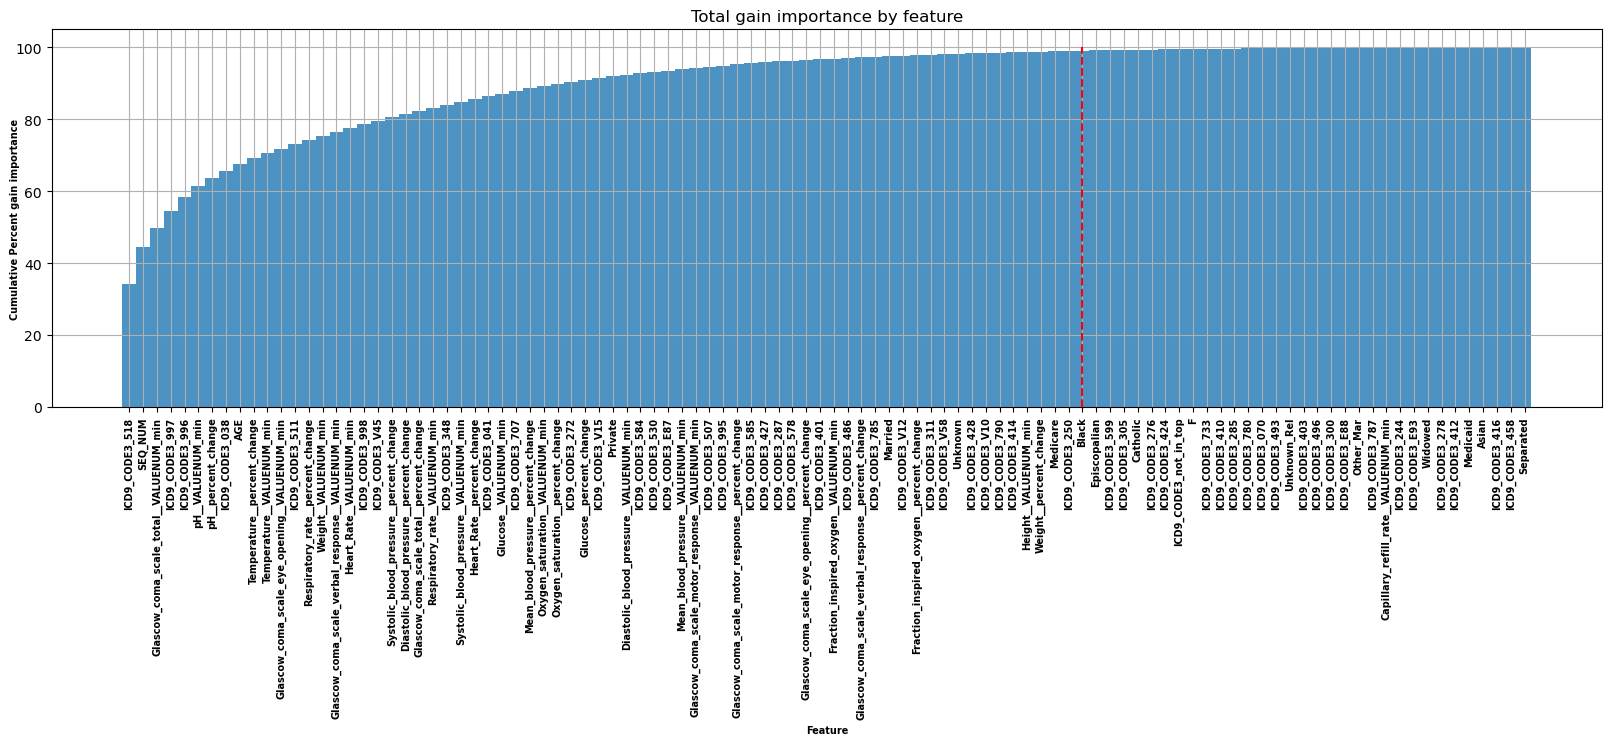

In [62]:
threshold=99
plt.rcParams = plt.rcParamsDefault
plt.figure(figsize = (20, 5))
index = np.arange(len(features_totalgain['Feature_total_gain']))
plt.bar(features_totalgain['Feature_total_gain'], features_totalgain.cum_perc, align='center', alpha=0.8,width=1)
plt.grid()
plt.title('Total gain importance by feature')
plt.xlabel('Feature', fontsize=7,fontweight='bold', va='top')
plt.ylabel('Cumulative Percent gain importance', fontsize=7, fontweight='bold', va='top')
plt.xticks(index,features_totalgain['Feature_total_gain'], fontsize=7,fontweight='bold', rotation=90, va='top')
importance_index = np.min(np.where(features_totalgain.cum_perc > threshold))
plt.vlines(x = list(features_totalgain['Feature_total_gain'])[importance_index], ymin = 0, ymax = 100, linestyles='--', colors = 'red')
print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))


In [76]:
print('Train MAE=',mean_absolute_error(train_labels1,predictions_train1))
print('Test MAE=',mean_absolute_error(test_labels1,predictions_test1))

Train MAE= 1.9571518298294743
Test MAE= 2.190038029296032


In [36]:
print('Train MSE=',mean_squared_error(train_labels,predictions_train))
print('Test MSE=',mean_squared_error(test_labels,predictions_test))

Train MSE= 13.448997557105866
Test MSE= 16.013943117260055


Text(0.5, 1.0, 'Actual vs Predicted LOS- Train Data')

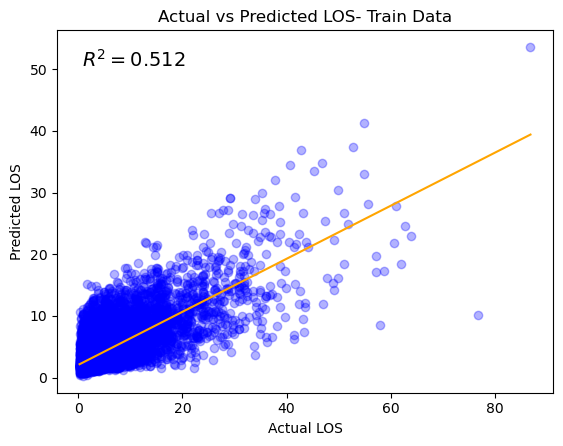

In [77]:

plt.scatter(train_labels1, predictions_train1, c="blue", alpha=0.3)
plt.xlabel("Actual LOS")
plt.ylabel("Predicted LOS")
plt.plot(np.unique(train_labels1), np.poly1d(np.polyfit(train_labels1, predictions_train1, 1))(np.unique(train_labels1)), c='orange')
text = f"$R^2 = {r2_score(train_labels1,predictions_train1):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top')
plt.title("Actual vs Predicted LOS- Train Data")

In [19]:
print(p)

 
0.4256 x + 2.092


In [22]:
Imp_top50[:50]

,Feature_total_gain,imp_metrics_total_gain
0,ICD9_CODE3_518,889537.982891
1,SEQ_NUM,274396.503602
2,Glascow_coma_scale_total__VALUENUM_min,134285.668126
3,ICD9_CODE3_997,126294.618658
4,ICD9_CODE3_996,102691.367864
5,pH__VALUENUM_min,76383.271591
6,pH__percent_change,60490.013515
7,ICD9_CODE3_038,52275.576063
8,AGE,45640.971131
9,Temperature__percent_change,43219.447723


In [55]:
def dist(yt,yhat,model):
    num_bins =300
    fig = plt.figure(figsize=(15,3))
    x1=yt
    x2=yhat
    n, bins, patches = plt.hist(x1, num_bins, range=[x1.min(), x1.max()], color='Green', edgecolor='Green' , alpha=0.5, label='Actual_'+model)
    n, bins, patches = plt.hist(x2, num_bins, range=[x1.min(), x1.max()], color='Blue', edgecolor='Blue', fc='None', alpha=0.5, label='Predict_'+model)
    plt.ylabel('ICU Stay Counts')
    plt.xlabel("ICU Length of Stay (Days)")
    plt.title("Distribution of Actual vs Predicted LOS Estimates: "+ model)
    plt.xlim((0, 20))
    plt.legend(loc='upper right')
    plt.show()
    return plt.show()


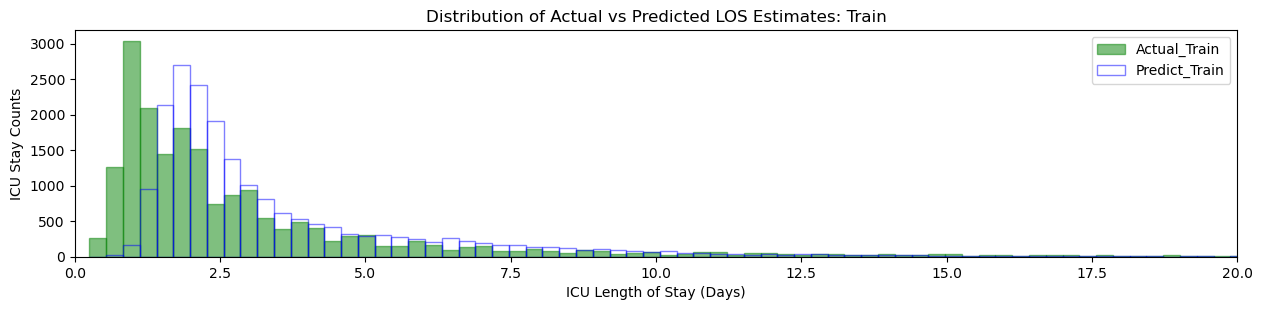

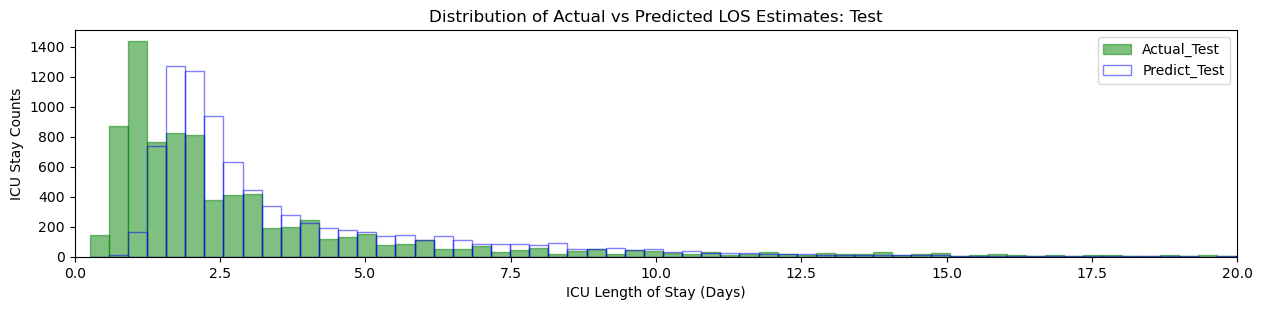

In [78]:
dist(train_labels1,predictions_train1 , model = 'Train')
dist(test_labels1,predictions_test1 , model = 'Test')

In [38]:
import shap

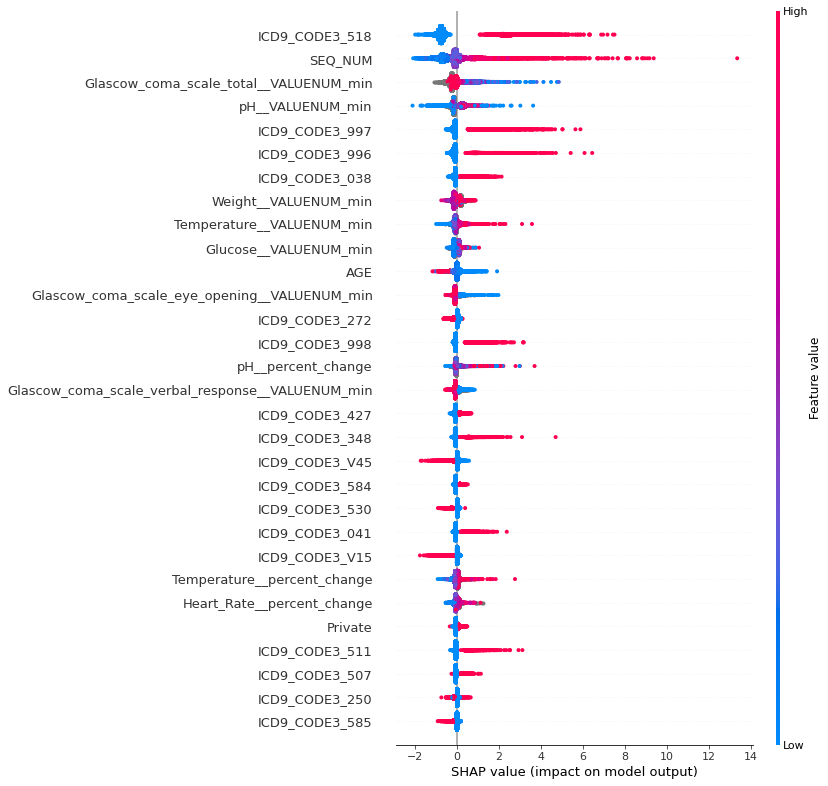

In [57]:
# Compute the SHAP values for every prediction in the test dataset
explainer = shap.TreeExplainer(model_best)
shap_values = explainer.shap_values(train_features)
plot = shap.summary_plot(shap_values,train_features, max_display=30, plot_type='dot')


In [37]:
query_icd = '''
SELECT * FROM mimiciii.D_ICD_DIAGNOSES
'''

In [38]:
icd = pd.read_sql(query_icd,conn)
icd.to_pickle('icd.pkl')

In [39]:
icd.head()

,row_id,icd9_code,short_title,long_title
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."
1,175,01170,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified"
2,176,01171,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h..."
3,177,01172,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h..."
4,178,01173,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou..."


In [34]:
import pickle